# Modélisation d'un réseau social

Un réseau social est d'abord un ensemble de relations entre entités. Par exemple dans le cas des réseaux sociaux (linked-in, facebook, twitter, instagram, snapchat ...), les entités sont supposés être des êtres humains qui ont plus ou moins de relations avec d'autres êtres humains.

## Quelques notions essentielles

Pour modéliser ces relations on se sert d'objets mathématiques appelés les *graphes*. Quelques définitions sont essentielles pour pouvoir caractériser un graphe :
> Un **nœud** sert à modéliser un individu, un lieu, ou tout autre une entité sociale.
> Une **arête** représentée par un trait entre deux nœuds, sert à modéliser une relation non-orientée (qui ne se fait pas dans un seul sens) entre deux individus ou entités.
> Un **arc** est une relation semblable à celle de l'arête sauf que dans ce cas il y a une orientation spécifique, par exemple A est un "follower" de B, mais la réciproque est fausse : B ne suit pas A. Dans la première partie nous allons voir des graphes non-orientés, ensuite nous nous intéresseront aux graphes orientés.

In [70]:
%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

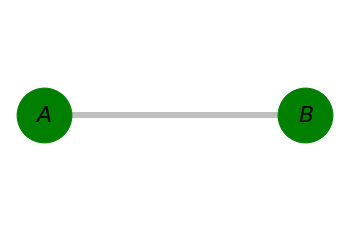

In [71]:
# Dans ce premier exemple on s'interesse 
# Exemple de graphe non orienté entre "A" et "B" 

# On va d'abord initialiser le graphe en question que l'on appelle "G"

G = nx.from_numpy_matrix(np.matrix([[0,1],[1,0]]))

# On va ensuite signaler la position des noeuds grâce à leurs coordonnées et leur adresse 

pos = {0: (0, 0),
       1: (1, 0),}

# On va enfin renomer les noeuds d'adresse "0" et "1" en utilisant "A" et "B"

labels={}
labels[0]=r'$A$'
labels[1]=r'$B$'

# Puis finalement on va afficher tout cela en couleurs 

nx.draw_networkx_nodes(G, pos, node_size=3000, nodelist=[0, 1], node_color='green')
nx.draw_networkx_labels(G,pos,labels,font_size=22)
nx.draw_networkx_edges(G, pos, alpha=0.5, width=6, edge_color='gray')

plt.axis('off')
plt.show()

### Exercices :
- Quelles sont les lignes de code qu'il faut modifier pour remplacer le 'A' et le 'B' par 'Papa' et 'Maman' ? 
- Dans ce graphe on a une seulle arête et deux sommets, comment colorer les arêtes en rouge et les sommets en rouge ?
- On veut faire un graphe vertical avec "Parents" en haut et "Enfants" en bas, comment s'y prendre ?

In [72]:
# Dans cette cellule vous pouvez recopier le contenu de la cellule précédente et faire les modifications demandées
#---------------------------------------------------------------------------------------------------------------#

Dans cet exemple "A" et "B" sont en relation : cette relation va dans les deux sens, il y a une arête et deux nœuds. On appelle aussi ces nœuds des sommets. Finalement on peut introduire un tableau appellé **matrice d'adjacence** qui permet de relier très simplement "A" à "B".
_____

$$\matrix{
 & A & B \cr
A & 0 & 1 \cr
B & 1 & 0 \cr}$$

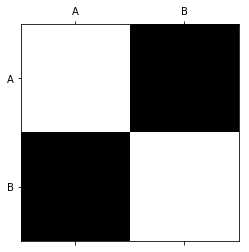

In [73]:
A = np.matrix([[0,1],[1,0]])
fig, ax = plt.subplots()
ax.set_xticklabels([" ","A","B"])
ax.set_yticklabels([" ","A","B"])
plt.spy(A)

On voit, noir sur blanc, que le noir correspond à la présence d'une relation entre "A" et "B" et entre "B" et "A". Nous allons voire dans l'exemple suivant comment rélier entre eux six sommets en utilisant la même règle.  

### Exercices :
- Quelles sont les lignes de code qu'il faut modifier pour que la case de la ligne 'B' et de la colonne 'B' soit en noir  ? 
- Comment modifier le code pour qu'il y ait une colonne et une ligne 'C' suplémentaires ?
- Dans ce cas A est en relation avec B et B est en relation avec A (A et B ne sont pas en relation avec eux mêmes c'est pour cela que la diagonale est blanche). Modifiez le tableau pour que C soit en relation avec A et B et réciproquement. Quel est le point commun du nouveau tableau ("A-B-C") avec le tableau précédent.

In [74]:
# Dans cette cellule vous pouvez recopier le contenu de la cellule précédente et faire les modifications demandées
#---------------------------------------------------------------------------------------------------------------#

## Lien entre la matrice d'adjacence et les graphes
Nous allons nous intéresser à la représentation d'un tableau de relations, sous forme de graphe. Nous commençons par une matrice (tableau de relations) de dimension 5 (on parle aussi de 5 *vecteurs*, mais cela fait partie du programme de mathématiques)

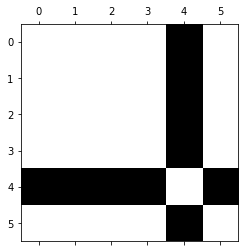

In [75]:
A = np.matrix([[0,0,0,0,1,0],[0,0,0,0,1,0],[0,0,0,0,1,0],[0,0,0,0,1,0],[1,1,1,1,0,1],[0,0,0,0,1,0]])
plt.spy(A)

Dans cet exemple tous les sommets sont connectés au point '4' mais ils ne sont pas reliés entre eux. On dit que '4' est la *star* du réseau. Cela se visualise de la façon suivante : 

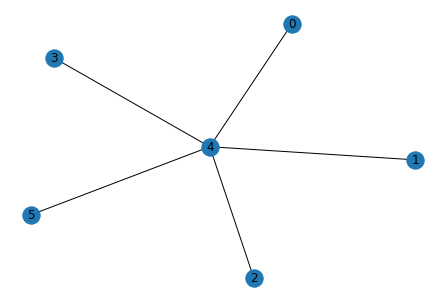

In [76]:
G = nx.from_numpy_matrix(A)
nx.draw(G,with_labels=True)
plt.show()

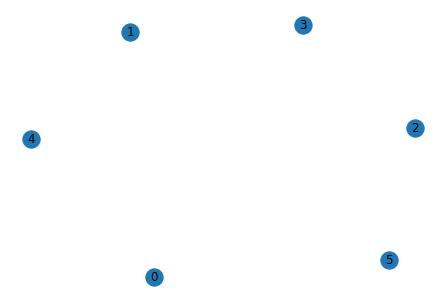

In [77]:
# En remplaçant les '0' par des '1' dans les vecteurs de la matrice B
# modifiez le code pour que ce soit le vecteur '2' qui devienne la nouvelle "star" du réseau
# On notera 'B' la matrice d'adjacence :


B = np.matrix([[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]])
G = nx.from_numpy_matrix(B)
nx.draw(G,with_labels=True)
plt.show()


## Représentation d'un réseau social sous forme d'un graphe

Nous allons passer à une partie plus pratique de l'activité dans laquelle on s'intéroge sur un exemple réel de réseau d'influence qui à eu des repercussions très importantes sur l'histoire Française du XVIème sciecle avec la personne de Catherine de Médicis. Comment une femme issu de la bourgeoisie financière de Toscanne peut elle arriver au niveau de gouvernement suprème d'un état, et œuvrer pour l'arbitrage délicat entre les partis antagonistes qui déchiraient le pays ?

In [78]:
## En utilisant l'exemple précédent faire la liste des enfants issus de Catherine de Médicis, 
## en dessinant comme arête la relation mère-fils

### Les rêgles de fonctionnement des familles de Florence

La découverte du nouveau monde à ouvert des perspectives commerciales exigeant des investissements financiers très importants. Or dans la pratique financière établie au Moyen-Age l'importance d'une lettre de change (ce qui est un chèque aujourd'hui) est cruciale pour l'économie. À la fin du XIV sciècle une famille de Florence, la maison de Médicis est un exemple de réussite par la mise en place de banques. Pendant plusieures générations ils vont mettre en place un réseau de gens de confiance pour assurer la tenue des postes de change filiales d'une maison mere. Le choix des familles en relation faisant ainsi l’objet d’un soin particulier. Une banque recrutait ses membres au sein du clan familial ou parmi ses alliés, c'est à dire des familles associées par des marriages. Les Médicis furent extraordinairement efficaces pour créer un réseau de familles florentines. Dans l'exercice suivant nous allons étudier ce type de réseau.   

In [79]:
# D'abord on importe le graphe des familles florentines du module NetworkX
# Le travail des chercheurs Ronald L. Breiger et Philippa E. Pattison sert 
# de point de départ pour cette activté

G = nx.florentine_families_graph()
G.edges(data=True)
adjacency_matrix = nx.adjacency_matrix(G)


### Exercice : 
- En utilisant la commande "plt.spy" indiquez quelle est l'index de la famille la plus populaire ?

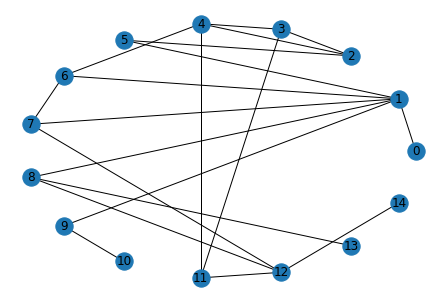

In [80]:
# On va déclarer un nouveau Graphe qui partant de la même matrice d'adjacence dispose les familles au sommet d'un
# polygone proche d'une ellipse
G2 = nx.from_scipy_sparse_matrix(adjacency_matrix)
nx.draw_circular(G2,with_labels=True)

On remarque tout d'abord que la famille qui rayonne le plus est la famille d'index '1', c'est la seule qui puisse mettre en relation '2' et '10'... Elle a donc un rôle privilégié.

In [81]:
print('Dans ce graphe il y a', len(G.nodes()), 'noeuds et', len(G.edges()), 'arêtes')

Dans ce graphe il y a 15 noeuds et 20 arêtes


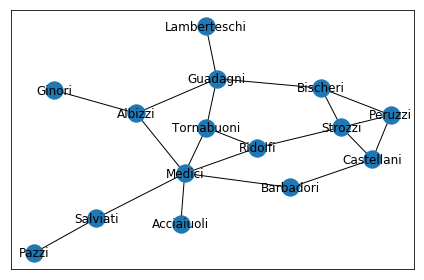

In [82]:
# Affichage
# On choisit de représenter les relations
# La famille Medici aparaît bien au centre du graphe

pos=nx.fruchterman_reingold_layout(G)
nx.draw_networkx(G, pos=pos)

plt.tight_layout()
plt.show()

In [83]:
# on peut dénombrer les relations qui sont représentées ici
# en utilisant l'attribut "size" du graphe
G.size()

20

On va maintenant signaler plus clairement les relations de la famille de Medici elle même.

In [84]:
# Les Noeud correspondent bien à chacune des familles avec l'orthographe italiènne
print(G.nodes())

['Acciaiuoli', 'Medici', 'Castellani', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati', 'Pazzi', 'Bischeri', 'Guadagni', 'Ginori', 'Lamberteschi']


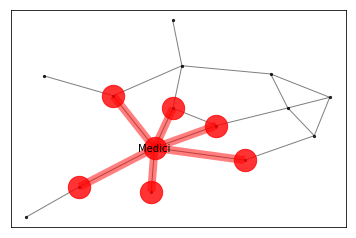

In [85]:
# On va chercher tous les noeux
nx.draw_networkx_nodes(G,pos,
                       node_color='k',
                       node_size=5,
                       alpha=0.8)

# Puis on s'interesse en particulier à ceux qui sont liés aux Médicis                       
nx.draw_networkx_nodes(G,pos,
                       nodelist=['Acciaiuoli','Medici', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi','Salviati'],
                       node_color='r',
                       node_size=500,
                       alpha=0.8)
# On affiche les arêtes
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)

# On souligne celles qui sont directement en contact avec les  Médicis

nx.draw_networkx_edges(G,pos,
                       edgelist=[('Medici','Salviati'),('Medici','Barbadori'),('Medici','Ridolfi'),('Medici','Acciaiuoli'),('Medici','Tornabuoni'),('Medici','Albizzi') ],
                       width=8,alpha=0.5,edge_color='r')

# On va clairement identifier le noeud qui correspond aux Médicis

H = G.subgraph('Medici')
labels = nx.draw_networkx_labels(H,pos,font_size=10)




Les [Médicis](https://fr.wikipedia.org/wiki/Maison_de_M%C3%A9dicis) sont au centre d'un réseau de 15 familles, dont les relations sont modélisées par des arêtes. Par leur position ils contrôlent un grand nombre de relations, on peut ainsi mesurer leur popularité. On comprends le rôle essentiel de cette famille dans la politique économique et culturelle du XIV et du XV sciecle à Florence et partout en Europe ! Imaginons cependant que les Medici aient une famille "rivale", on prendra celle qui a le réseau le plus éloigné, pour l'exemple il s'agit des [Strozzi](https://fr.wikipedia.org/wiki/Famille_Strozzi) la deuxième famille plus influente selon le calcul .  

In [86]:
noeuds_et_aretes = sorted(dict(G.degree()).items(), key = lambda x: x[1], reverse = True)
## On veut savoir quelles sont les trois familles les plus puissantes
noeuds_et_aretes[:3]

[('Medici', 6), ('Strozzi', 4), ('Guadagni', 4)]

*On va faire la même étude avec une autre famille influente : les Strozzi, pour visualiser leur influence il faut superposer les deux graphes, en rouge les relations des Médicis et en jaune celle des Strozzi*

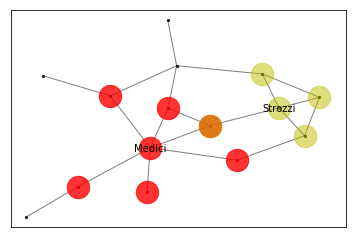

In [87]:
# On va chercher tous les noeux
nx.draw_networkx_nodes(G,pos,
                       node_color='k',
                       node_size=5,
                       alpha=0.8)

# Puis on s'interesse en particulier à ceux qui sont liés aux Médicis                       
nx.draw_networkx_nodes(G,pos,
                       nodelist=['Acciaiuoli','Medici', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi','Salviati'],
                       node_color='r',
                       node_size=500,
                       alpha=0.8)

# Et enfin on s'interesse à ceux qui sont liés aux Strozzi                       
nx.draw_networkx_nodes(G,pos,
                       nodelist=['Strozzi','Ridolfi', 'Bischeri', 'Castellani','Peruzzi'],
                       node_color='y',
                       node_size=500,
                       alpha=0.5)

H = G.subgraph(['Medici','Strozzi'])
labels = nx.draw_networkx_labels(H,pos,font_size=10)

nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
# L'instruction suivante vous permet de sauver la figure avec les
# relations entre Strozzi et Médicis
#plt.savefig("Medici_et_Strozzi.png")

### Exercice
- Quel est le nombre de de sommets d'un centre du graphe au plus éloigné des autres sommets ?
- On veut faire la même étude avec une autre famille influente : les *Guadagni*, pouvez vous superposer les deux graphes comme nous l'avont fait pour les *Strozzi* ?
 

In [88]:
# Dans cette cellule on cherche à reproduire l'analyse précédente
# on s'interesse à ceux qui sont liés aux Guadagni   

In [89]:
# On peut calculer le degré de centralité 
# Cette mesure nous permet d'obtenir l'activité du nœud étudié

degree_centrality = nx.degree_centrality(G)

# Pour afficher le contennu de cette variable on l'appelle tout simplement :
degree_centrality

{'Acciaiuoli': 0.07142857142857142,
 'Medici': 0.42857142857142855,
 'Castellani': 0.21428571428571427,
 'Peruzzi': 0.21428571428571427,
 'Strozzi': 0.2857142857142857,
 'Barbadori': 0.14285714285714285,
 'Ridolfi': 0.21428571428571427,
 'Tornabuoni': 0.21428571428571427,
 'Albizzi': 0.21428571428571427,
 'Salviati': 0.14285714285714285,
 'Pazzi': 0.07142857142857142,
 'Bischeri': 0.21428571428571427,
 'Guadagni': 0.2857142857142857,
 'Ginori': 0.07142857142857142,
 'Lamberteschi': 0.07142857142857142}

Les *Strozzi* apparaissent vraiment comme plus "excentrés" que les *Médicis*. Ce problème qui les contraindra à l'exil peut être anticipé en utilisant la théorie des graphes. On peut maintenant se posser la question autrement : " qui peux jouer le rôle d'intermédiaire entre les *Médicis et les *Strozzi* ? "

In [90]:
#La centralité de proximité
#Un nœud plus central a une distance plus faible à tous les autres nœuds.
import operator  # Cette instruction sert a importer la fonction "sorted"

closeness_centrality = nx.closeness_centrality(G)
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=operator.itemgetter(1), reverse=True)

# Pour afficher les differentes familles on fait simplement appel à la variable :
sorted_closeness_centrality

[('Medici', 0.56),
 ('Ridolfi', 0.5),
 ('Tornabuoni', 0.4827586206896552),
 ('Albizzi', 0.4827586206896552),
 ('Guadagni', 0.4666666666666667),
 ('Strozzi', 0.4375),
 ('Barbadori', 0.4375),
 ('Bischeri', 0.4),
 ('Castellani', 0.3888888888888889),
 ('Salviati', 0.3888888888888889),
 ('Acciaiuoli', 0.3684210526315789),
 ('Peruzzi', 0.3684210526315789),
 ('Ginori', 0.3333333333333333),
 ('Lamberteschi', 0.32558139534883723),
 ('Pazzi', 0.2857142857142857)]

On remarque que la famille *Ridolfi* arrive en deuxième position. Est ce possible d'imaginer qu'elle puisse servir d'intermédiaire entre les deux familles rivales ?

(-1.0361195445560858,
 0.9666984453804162,
 -1.0824537916926678,
 1.1232543082417157)

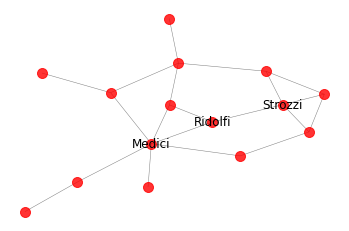

In [91]:
# On va montrer que les Ridolfi sont les seuls intermédiaires directs entre les Médicis et les Strozzi.
nx.draw_networkx_nodes(G,pos,
                       node_color='r',
                       node_size=100,
                       alpha=0.8)


H = G.subgraph(['Medici','Strozzi','Ridolfi'])
labels = nx.draw_networkx_labels(H,pos,font_size=12)

nx.draw_networkx_edges(G,pos,width=0.5,alpha=0.5)
plt.axis('off')

 Nous présentons maintenant les résultats sous forme d'un rapport technique. Il est intéressant de retrouvers des définitions comme :
 
- > **Centre** : Sommet le plus proche de tous les autres dans un graphe
- > **Diamètre** : Plus grande distance entre deux sommets quelconques du graphe
- > **Distance** (entre deux sommets) : Nombre minimum d'arêtes entre deux sommets
- > **Graphe** : Représentation schématique d'un réseau
- > **Rayon** : Distance d'un centre du graphe au plus éloigné des autres sommets     

In [92]:
# Nous souhaitons avoir un rapport concernant le graphe 


G = nx.florentine_families_graph()

pathlengths=[]

print("Sommet arête {Sommet à atteindre:longueur, }\n")
for v in G.nodes():
    spl=nx.single_source_shortest_path_length(G,v)
    print('%s %s \n'% (v,spl))
    for p in spl.values():
        pathlengths.append(p)

print('')
print("Nombre de relations en moyenne pour parvennir à toutes les familles %s" % (sum(pathlengths)/len(pathlengths)))



print('')

print("---------------------------------------- \n")
print("RAYON : %d \n" % nx.radius(G))
print("DIAMETRE : %d \n" % nx.diameter(G))
print("decré d'eccentricité: %s  \n" % nx.eccentricity(G))
print("nœuds au centre: %s \n" % nx.center(G))
print("nœuds en peripherie: %s \n" % nx.periphery(G))
print("densité du réseau : %s" % nx.density(G))

Sommet arête {Sommet à atteindre:longueur, }

Acciaiuoli {'Acciaiuoli': 0, 'Medici': 1, 'Barbadori': 2, 'Ridolfi': 2, 'Tornabuoni': 2, 'Albizzi': 2, 'Salviati': 2, 'Castellani': 3, 'Strozzi': 3, 'Guadagni': 3, 'Ginori': 3, 'Pazzi': 3, 'Peruzzi': 4, 'Bischeri': 4, 'Lamberteschi': 4} 

Medici {'Medici': 0, 'Acciaiuoli': 1, 'Barbadori': 1, 'Ridolfi': 1, 'Tornabuoni': 1, 'Albizzi': 1, 'Salviati': 1, 'Castellani': 2, 'Strozzi': 2, 'Guadagni': 2, 'Ginori': 2, 'Pazzi': 2, 'Peruzzi': 3, 'Bischeri': 3, 'Lamberteschi': 3} 

Castellani {'Castellani': 0, 'Peruzzi': 1, 'Strozzi': 1, 'Barbadori': 1, 'Bischeri': 2, 'Ridolfi': 2, 'Medici': 2, 'Guadagni': 3, 'Tornabuoni': 3, 'Acciaiuoli': 3, 'Albizzi': 3, 'Salviati': 3, 'Lamberteschi': 4, 'Ginori': 4, 'Pazzi': 4} 

Peruzzi {'Peruzzi': 0, 'Castellani': 1, 'Strozzi': 1, 'Bischeri': 1, 'Barbadori': 2, 'Ridolfi': 2, 'Guadagni': 2, 'Medici': 3, 'Tornabuoni': 3, 'Albizzi': 3, 'Lamberteschi': 3, 'Acciaiuoli': 4, 'Salviati': 4, 'Ginori': 4, 'Pazzi': 5} 

Stroz

### Exercice

- Quelle est le nombre d'arêtes d'un sommet au centre du graphe au **plus éloigné** des autres sommets ?
- Quelle est le **nombre maximal** d'arêtes entre deux sommets quelconques du graphe ?
- Quelles sont les trois familles qui sont à **trois** intermédiaires des Médicis ?

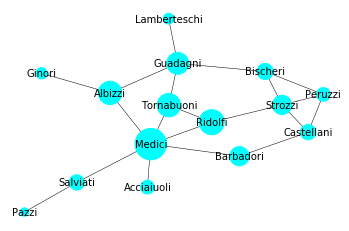

In [93]:
# L'objet de ce code est de détérminer la taille des Nœuds en fonction de leur degré de centralité

G = nx.florentine_families_graph()


j=0
Proximite=[]
for i in closeness_centrality:
        Close=closeness_centrality[i]
        Proximite.append(Close)

node_sizes = [3 +  pow(10 *i,4) for i in Proximite]

M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='cyan')
edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, width=0.5)
labels = nx.draw_networkx_labels(G,pos,font_size=10)


ax = plt.gca()
ax.set_axis_off()
plt.show()

### Exercice : 
- En une phrase décrivez la relation entre la taille du nœud et sa position dans le graphe

## Autres exemples d'application des graphes

Les Exemple du parcours :
Si l'on prends l'exemple le graphe des distances séparant deux gares connectées directement (et non les autres gares à un horizon plus lointain) sont connues.

L'algorithme de recherche du trajet optimal calcule, le minimum de distance entre la gare d'arrivée et chaque gare intermédiaire. La meilleure solution est déterminée au fur et à mesure, ainsi que le chemin associé. C’est bien là tout l’intérêt de l’algorithme : donner la distance minimale et le chemin entre une gare d’arrivée et une autre gare (la gare de départ).

# Conclusion

On voit comment la famille Médicis a compris le "résautage" pour changer le monde. Dans notre étude nous avons prouvé que quelque soit la représentation choisie (il y en à une infinité) un graphe permet de visualiser des relations entre individus. C'est donc un outil de choix pour la gestion des réseaux sociaux.